# About data

## Dataset provides information about three classes of an irises

Columns:
* sepal length [cm]
* sepal width [cm]
* petal length [cm]
* petal width [cm]
* class (setosa, versicolor, virginica)

In [152]:
import pandas as pd

In [154]:
df = pd.read_csv('iris.csv', sep=",")

# 1. Familiarization with several random values in the table and data transformation

In [157]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
126,6.2,2.8,4.8,1.8,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
30,4.8,3.1,1.6,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor


In [159]:
df['class'] = df['class'].str.replace('Iris-', '').str.title()

# 2. Checking for missing values

In [162]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# 3. General overview of numerical statistics (without class separation)

In [165]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# 4. Overall correlation between columns (without class separation)

In [168]:
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# 5. Grouping by class and aggregating groups

In [171]:
groupped_df = df.groupby('class')
aggs = ['min', 'max']
groupped_agg_df = groupped_df.agg(
    {'sepal_length' : aggs,
     'sepal_width' : aggs,
     'petal_length' : aggs, 
      'petal_width' : aggs}
)
groupped_agg_df

sepal_length      sepal_width      petal_length      petal_width  \
                    min  max         min  max          min  max         min   
class                                                                         
Setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
Versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
Virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
            max  
class            
Setosa      0.6  
Versicolor  1.8  
Virginica   2.5

# 6. Visualization of maximum sizes according to class

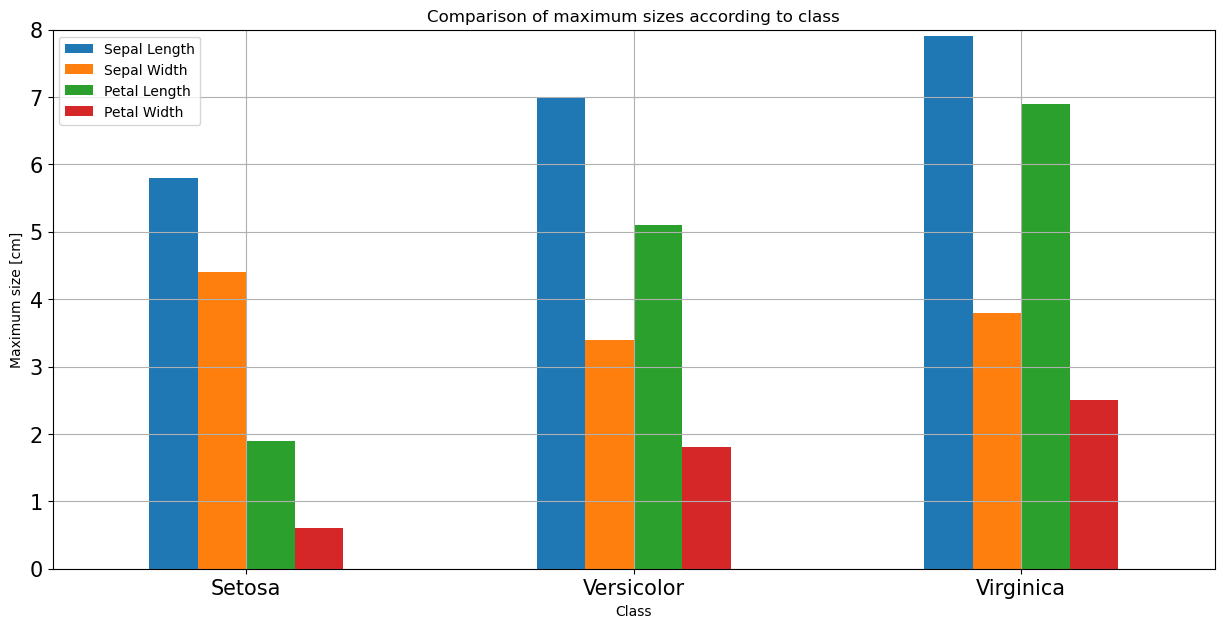

In [174]:
ax = groupped_agg_df.plot(
    kind = 'bar', 
    y = [('sepal_length', 'max'), ('sepal_width', 'max'), ('petal_length', 'max'), ('petal_width', 'max')],
    rot = 0,
    grid = True,
    figsize = (15, 7), 
    title = 'Comparison of maximum sizes according to class',
    ylim = (0,8), 
    ylabel = 'Maximum size [cm]', 
    xlabel = 'Class', 
    fontsize = 15
)
ax.legend(title = False, loc = 'upper left', labels = ('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'))

# 7. Calculating growth for each class

In [177]:
growth_df = groupped_agg_df.xs('max', axis = 1, level = 1) - groupped_agg_df.xs('min', axis = 1, level = 1)
growth_df

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Setosa,1.5,2.1,0.9,0.5
Versicolor,2.1,1.4,2.1,0.8
Virginica,3.0,1.6,2.4,1.1


# 8. Visualization of growth for each class

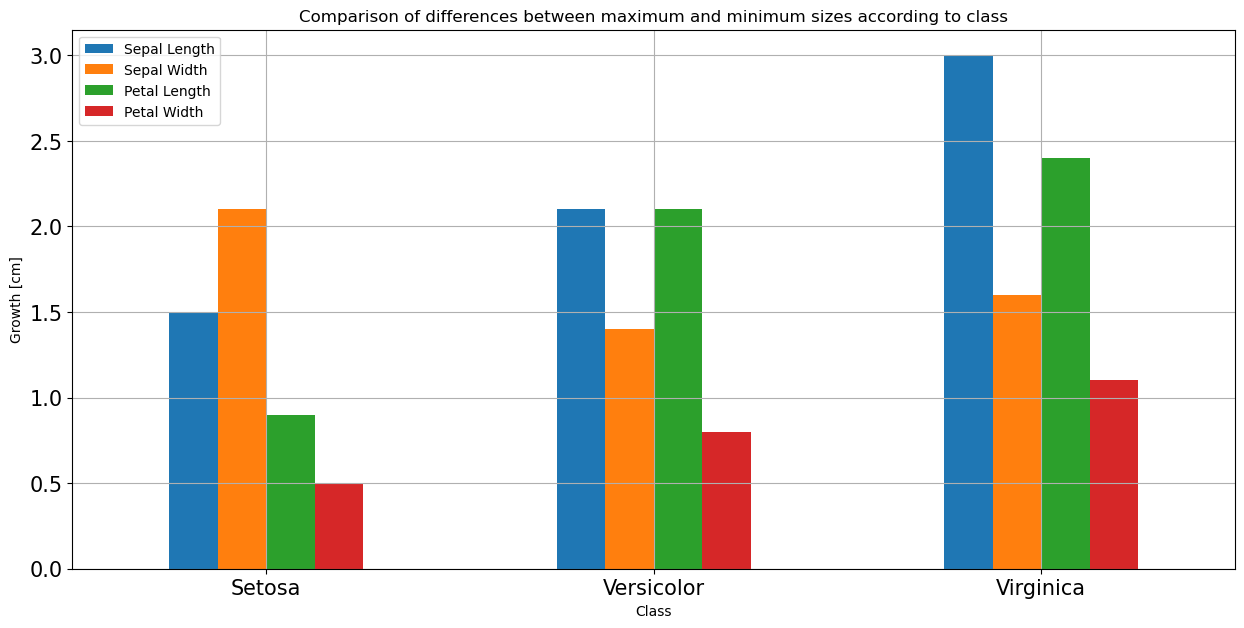

In [180]:
ax = growth_df.plot(
    kind = 'bar',
    y = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],           
    grid = True, figsize = (15, 7),
    title = 'Comparison of differences between maximum and minimum sizes according to class',
    fontsize = 15,
    rot = 0,
    xlabel = 'Class',
    ylabel = 'Growth [cm]'
)
ax.legend(title = False, loc = 'upper left', labels = ('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'))

# 9. Conclusions and observations:
1. The median of each feature is close to the mean value. An exception is petal length – here, a larger difference between these values can be observed.
1. Petal length shows a relatively large standard deviation compared to the mean.
1. Positive correlations (above 0.8) between sepal length, petal length, and petal width indicate a mutual increase in these values.
1. While analyzing the correlation of sepal width with other features, no clear dependency can be determined.
1. Virginica has the longest dimensions and the widest petal among all species.
1. Versicolor ranks second in the same categories as Virginica.
1. Setosa is a flower with shorter dimensions and a narrower petal, but it has a significantly wider sepal compared to the other classes.
1. Virginica and Versicolor show the greatest increases in sepal length, petal length, and petal width.
1. Setosa is a class with smaller growth in size compared to the others, but with a significantly greater increase in sepal width.